Given the values of an unknown function $f: \mathbb{R} \to \mathbb{R}$ at some selected points, we try to calculate the parameters of a model function using OLS as a distance and a ridge regularization. We have two options for the model function:

- (if $\xi_{15} = 0$): a polynomial model function of thirteen $\alpha_i$ parameters:
$$f(x) = \alpha_0 + \alpha_1 x + \alpha_2 x^2 + \cdots + \alpha_{12} x^{12}$$


Calculate the OLS estimate, and the OLS ridge-regularized estimates for the parameters given the sample points of the graph of $f$ given that the values are $y = \xi_{16}$. Provide a graphical representation of the graphs of the approximating functions and the data points. Remember to include the steps of your computation which are more important than the actual computations.

In [8]:
import sklearn as sk
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from matplotlib  import pyplot as plt
import numpy as np
import seaborn as sns
from pprint import  pprint

data_points = [
    (8, 127433440427.93),
    (9, 455607796096.94),
    (-12, 4606791204420.56),
    (15, 180878513712957.6),
    (10, 1637803075559.21),
    (13, 33444295810203.46),
    (4, 44293389.84),
    (-9, 97749416600.4),
    (17, 764641404511483.2),
    (-7, 2100755903.26),
    (-1, -7.9),
    (-2, -9770.07),
    (18, 1574526396408553.5),
    (6, 4624964052.51),
    (-4, -8665897.85),
    (-6, 6959469.09),
    (3, 1720107.86),
    (5, 538222472.88),
    (-14, 32074290256609.59),
    (-16, 171527592284611.6),
    (0, -4.86),
    (1, 10.28),
    (-17, 369051651390021.94),
    (-10, 389311225273.36),
    (12, 12952353048611.79),
    (14, 81115064579528.31)
]


# set OLS
ols = LinearRegression(fit_intercept=True)

# setting OLS ridge
Ols_ridge = Ridge(alpha=1, fit_intercept=True)

X = np.array([x[0] for x in data_points]).reshape(-1, 1)

Y = np.array([x[1] for x in data_points])

# polynomial = polynomialFeatures(degree=12)

# import polonomial features
polynomial = sk.preprocessing.PolynomialFeatures(degree=12)


ols_model = ols.fit(x_poly, Y)


x_poly = polynomial.fit_transform(X)

y_pred = ols_model.predict(x_poly)


try:
    ols_model_ridge = Ols_ridge.fit(x_poly, Y)
except:
    pass

y_pred_ridge = ols_model_ridge.predict(x_poly)


# ols_model_ridge = Ols_ridge.fit(X, Y)

print(ols_model.coef_)

# print(ols_model_ridge.coef_)

X_range = np.linspace(min(X), max(X), 100, endpoint=True)

X_range_polynomial = polynomial.fit_transform(X_range.reshape(-1, 1))


# for i in X_range_polynomial:
#     print(i)

[ 0.00000000e+00 -3.06841382e+11 -1.85007668e+11  2.81805167e+10
  9.41506175e+09 -6.38912005e+08 -1.63183460e+08  5.60574504e+06
  1.22650254e+06 -2.08177512e+04 -4.12561652e+03  3.32774519e+01
  6.06592102e+00]


c:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.34986e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [9]:
X_range = np.linspace(start=min(X), stop=max(X), num=int(max(X) - min(X) + 1))

X_range_polynomial = polynomial.fit_transform(X_range.reshape(-1, 1))


In [10]:

# import polonomial features
polynomial = sk.preprocessing.PolynomialFeatures(degree=12)


# x_poly = polynomial.fit_transform(X)

y_pred = ols_model.predict(X_range_polynomial)

y_pred_ridge = ols_model_ridge.predict(X_range_polynomial)

ols_model = ols.fit(x_poly, Y)


Text(0.5, 1.0, 'Scatter plot with regression line')

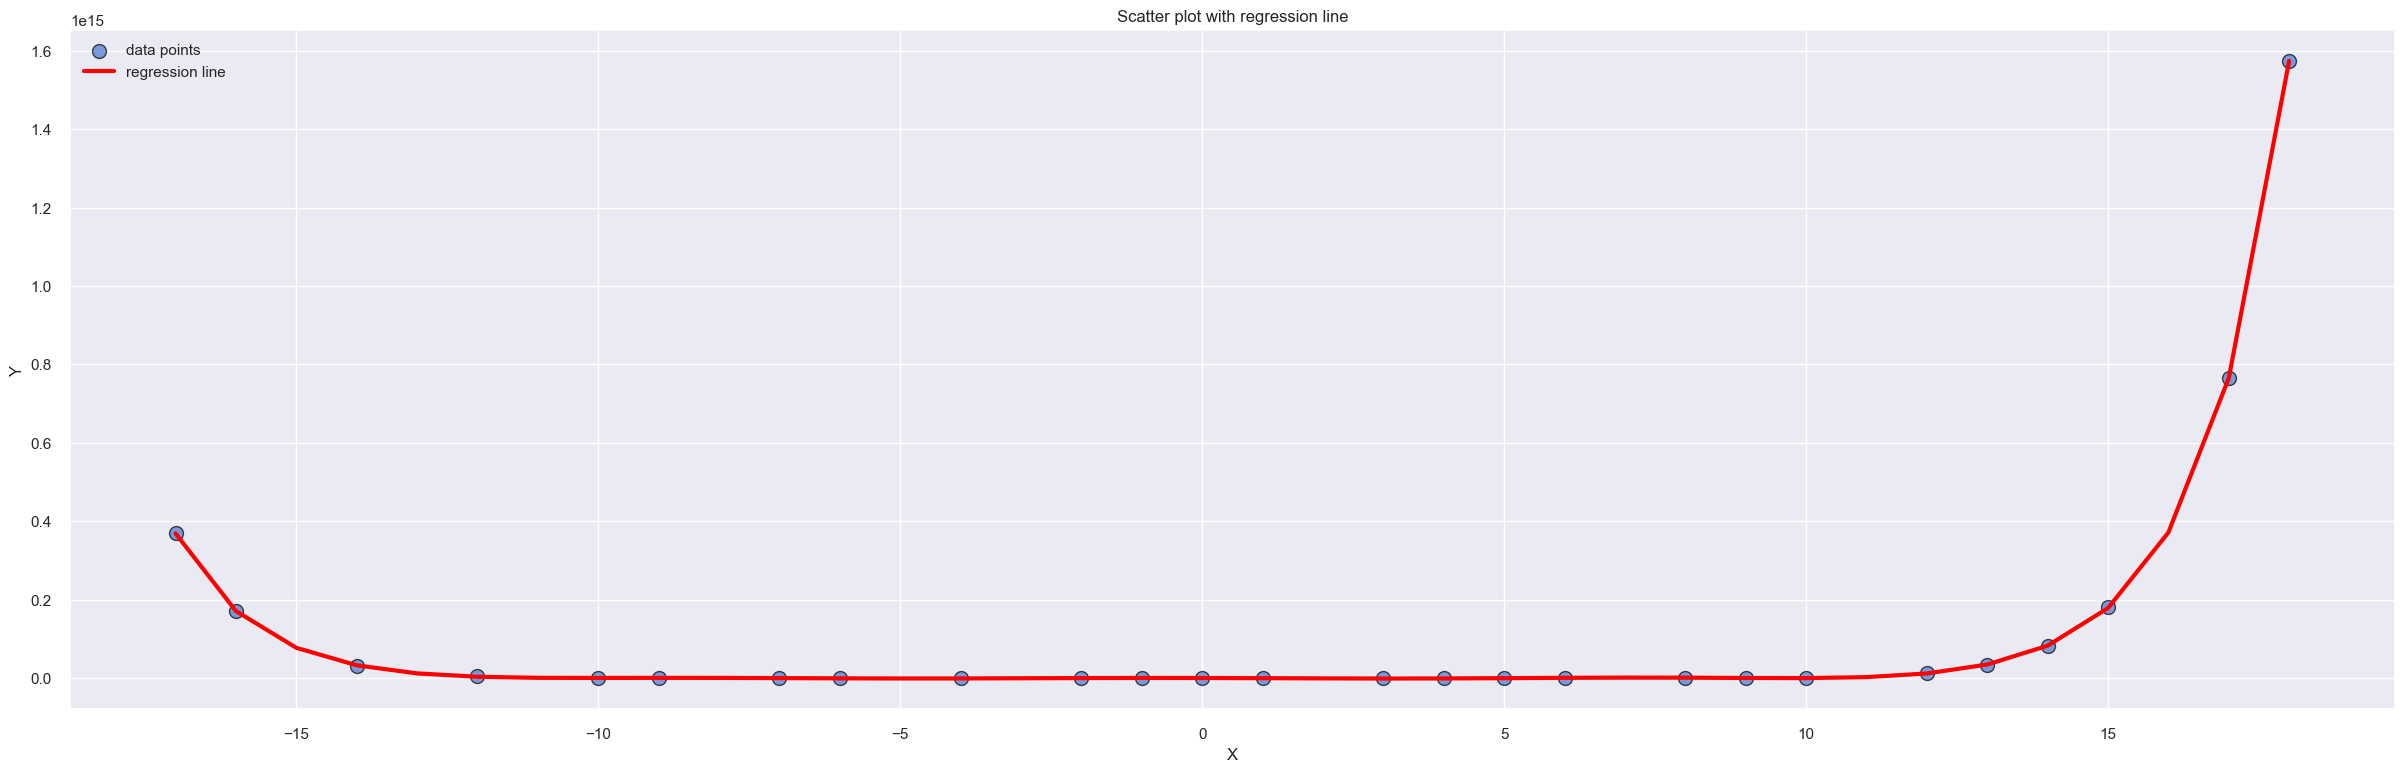

In [18]:
# Import seaborn for better aesthetics
import seaborn as sns

# Set the style and color palette
sns.set_style('darkgrid')
sns.set_palette('muted')

# Create a figure with a larger font size
plt.figure(figsize=(30,9), dpi=100)
plt.rc('font', size=16)

# Scatter the data points with some transparency and jitter
plt.scatter(X, Y, label='data points', alpha=0.7, s=100, edgecolor='black', linewidth=1)

# Plot the regression line with a thicker width and a legend
plt.plot(X_range, y_pred, color='red', label='regression line', linewidth=3)
plt.legend()

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with regression line')


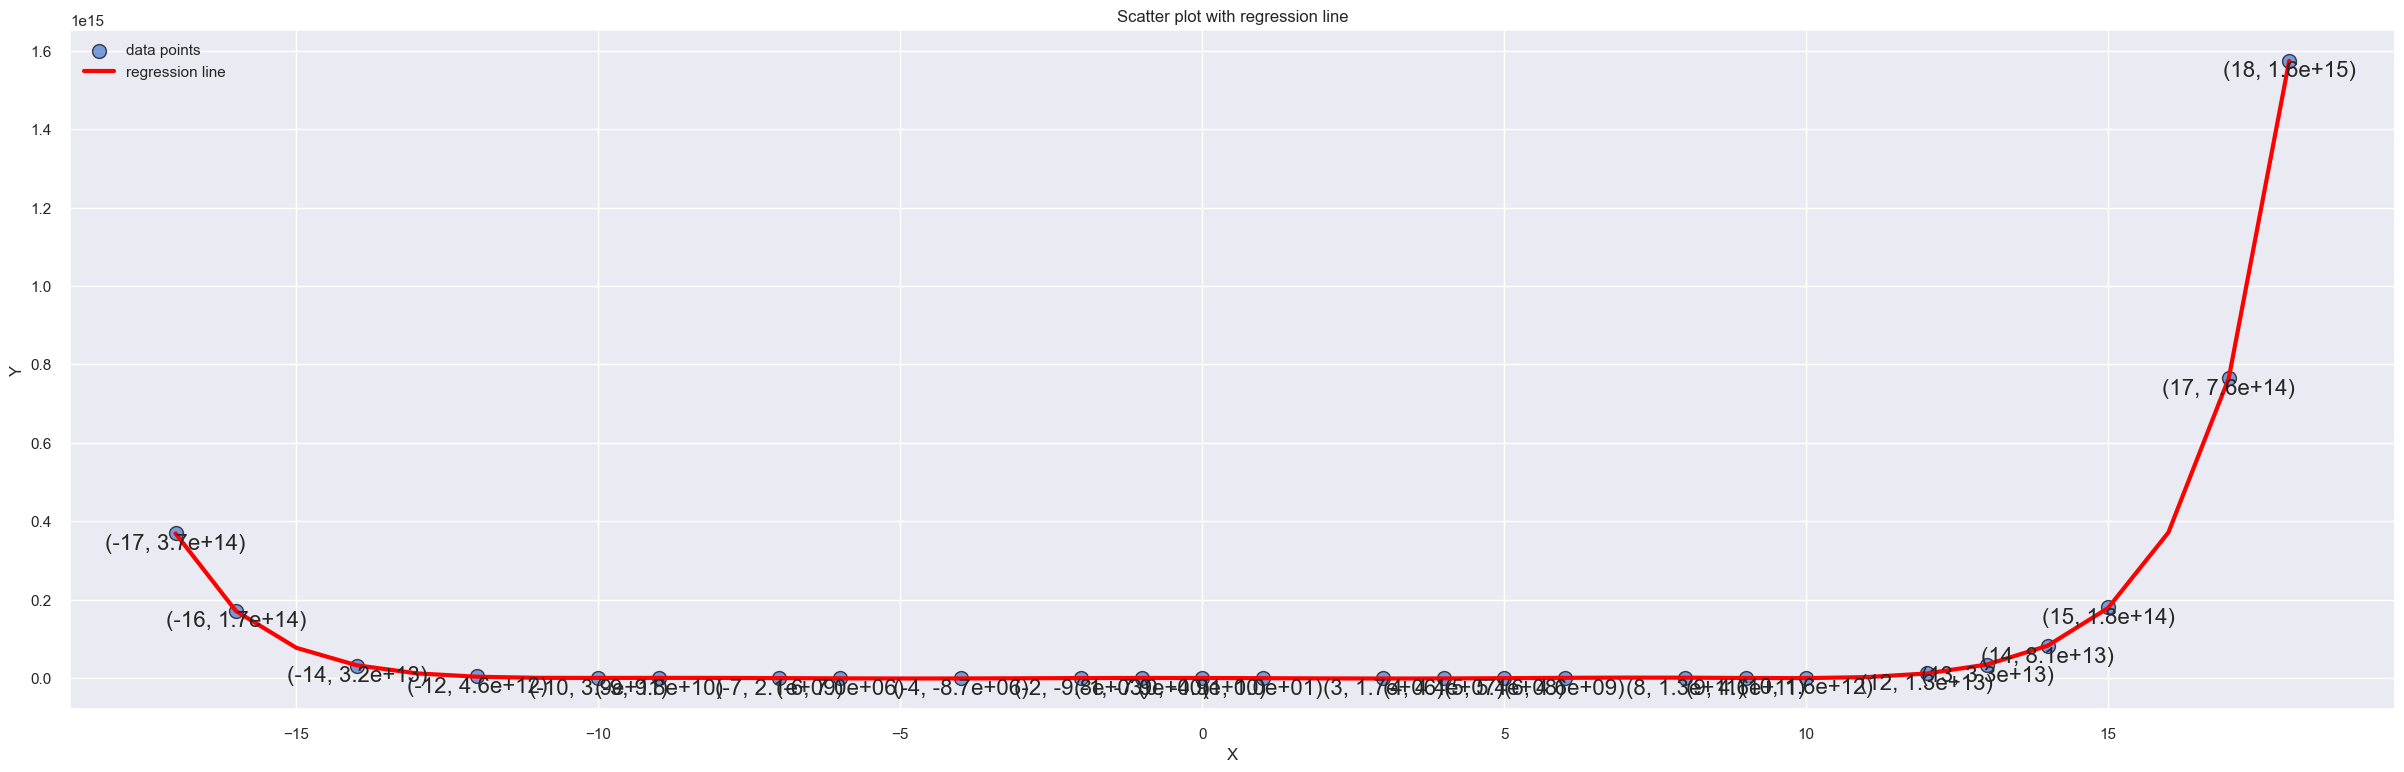

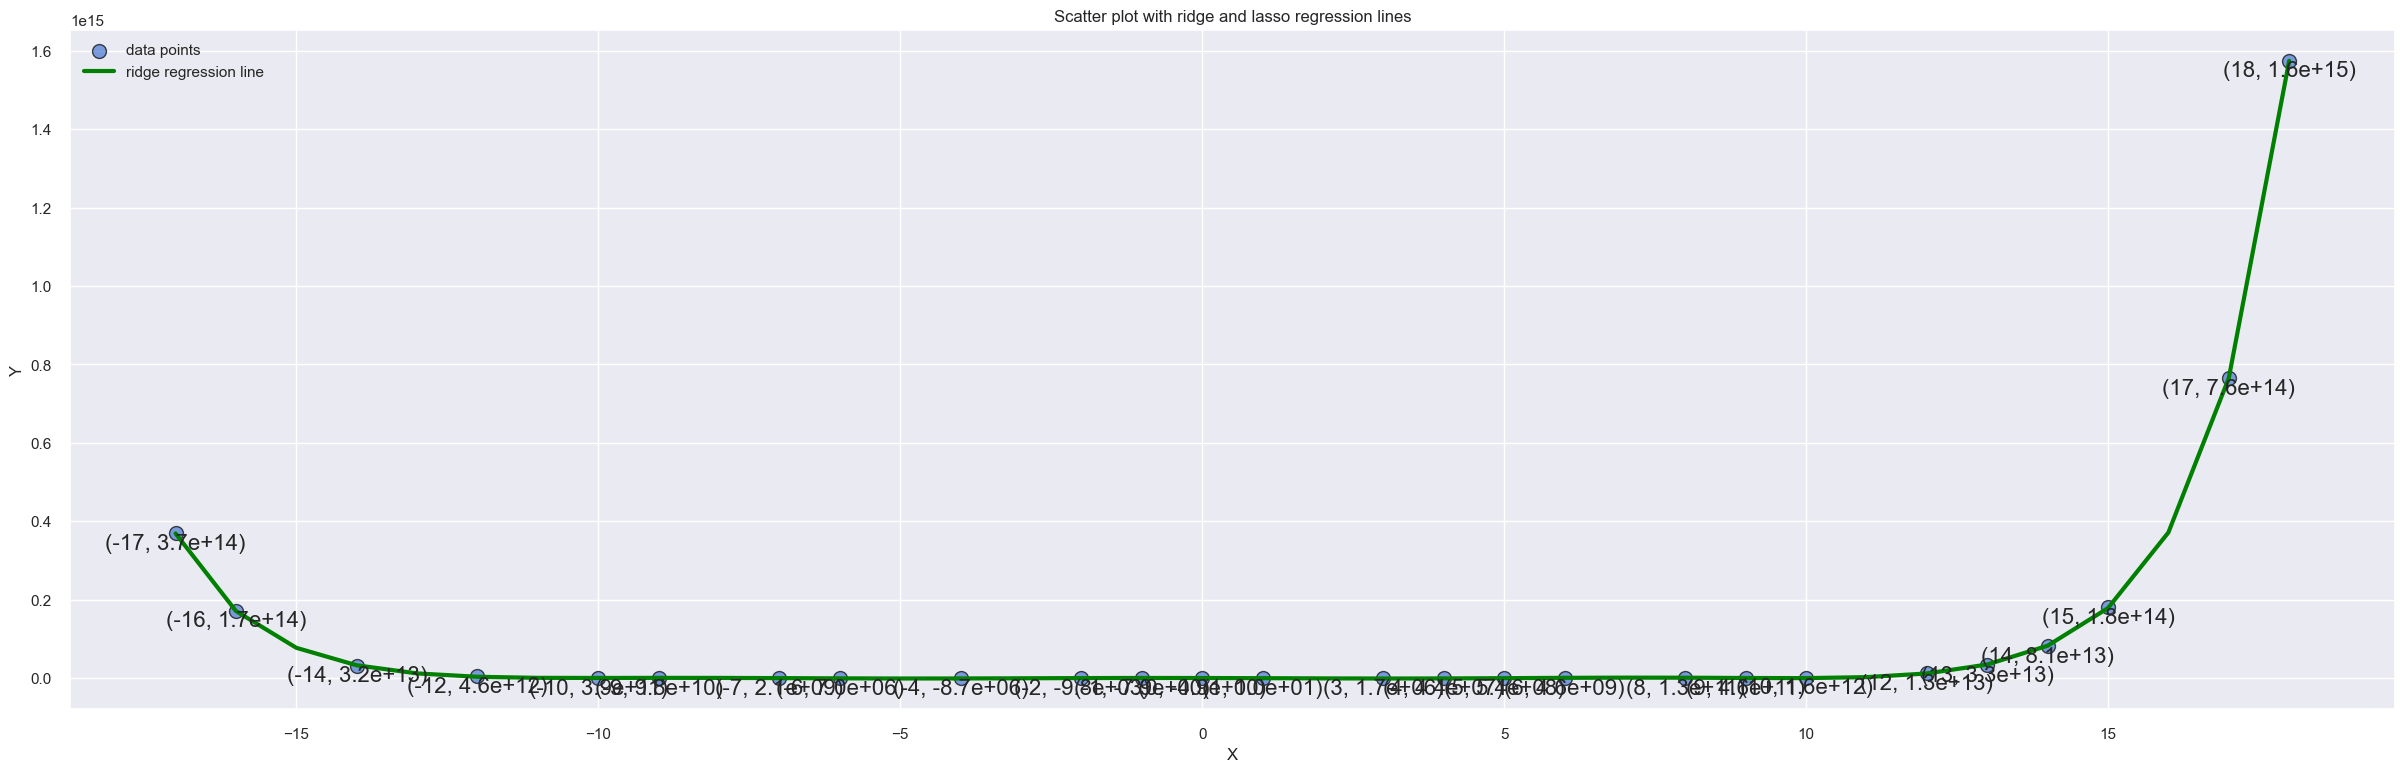

In [24]:
Y = [ 1.27433440e+11,  4.55607796e+11,  4.60679120e+12,  1.80878514e+14,
        1.63780308e+12,  3.34442958e+13,  4.42933898e+07,  9.77494166e+10,
        7.64641405e+14,  2.10075590e+09, -7.90000000e+00, -9.77007000e+03,
        1.57452640e+15,  4.62496405e+09, -8.66589785e+06,  6.95946909e+06,
        1.72010786e+06,  5.38222473e+08,  3.20742903e+13,  1.71527592e+14,
       -4.86000000e+00,  1.02800000e+01,  3.69051651e+14,  3.89311225e+11,
        1.29523530e+13,  8.11150646e+13]

X_ = np.ravel(X)
Y_ = np.ravel(Y)
xy = list(zip(X_, Y_))

# plt.figure(figsize=(30,9))
# plt.scatter(X, Y, label='data_points')
# plt.plot(X_range, y_pred, color='red')
# Import seaborn for better aesthetics
import seaborn as sns

# Set the style and color palette
sns.set_style('darkgrid')
sns.set_palette('muted')

# Create a figure with a larger font size
plt.figure(figsize=(30,9), dpi=100)
plt.rc('font', size=10)

# Scatter the data points with some transparency and jitter
plt.scatter(X, Y, label='data points', alpha=0.7, s=100, edgecolor='black', linewidth=1)

# Plot the regression line with a thicker width and a legend
plt.plot(X_range, y_pred, color='red', label='regression line', linewidth=3)
plt.legend()

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with regression line')



position = 3
for x, y in xy:
    plt.text(x, y, f'({x}, {y:.1e})', ha='center', va='top')
    position = -position


# plt.figure(figsize=(30,9))
# plt.scatter(X, Y, label='data_points')
# # plt.plot(X_range, y_pred_lasso, color='blue')
# plt.plot(X_range, y_pred_ridge, color='green')

# Create a figure with a larger font size
plt.figure(figsize=(30,9), dpi=100)
plt.rc('font', size=10)

# Scatter the data points with some transparency and jitter
plt.scatter(X, Y, label='data points', alpha=0.7, s=100, edgecolor='black', linewidth=1)

# Plot the ridge regression line with a thicker width and a legend
plt.plot(X_range, y_pred_ridge, color='green', label='ridge regression line', linewidth=3)

# Uncomment the next line to plot the lasso regression line
# plt.plot(X_range, y_pred_lasso, color='blue', label='lasso regression line', linewidth=3)

plt.legend()

# Add labels and a title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot with ridge and lasso regression lines')


position = 3
for x, y in xy:
    plt.text(x, y, f'({x}, {y:.1e})', ha='center', va='top')
    position = -position


# plt.plot(X, y_pred, color='red')
# y_pred = ols_model.predict(X)
# plt.plot(X, y_pred, color='red')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (26, 1) and (36,)

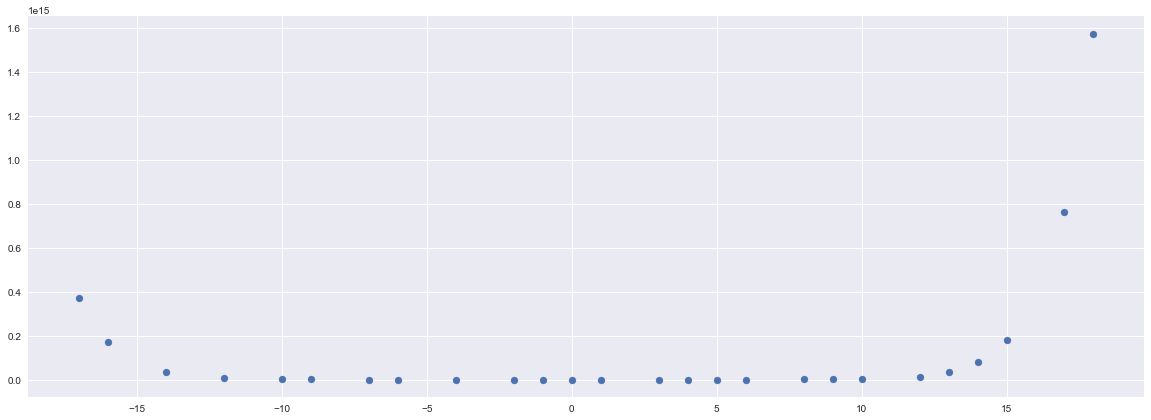

In [14]:
# plt.figure(figsize=(20,7))
# plt.scatter(X, Y, label='data_points')

# plt.plot(X, y_pred, color='red')
# # y_pred = ols_model.predict(X)

# # plt.plot(X, y_pred, color='red')

# # plt.show()

ValueError: X has 1 features, but LinearRegression is expecting 13 features as input.

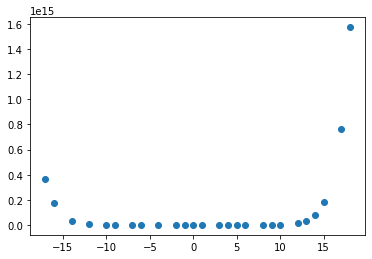

In [51]:

plt.scatter(X, Y)

y_pred = ols_model.predict(X)

plt.plot(X, y_pred, color='red')

plt.show()


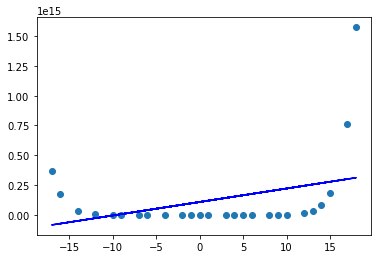

In [43]:

plt.scatter(X, Y)
y_pred = ols_model_ridge.predict(X)
plt.plot(X, y_pred, color='blue')
plt.show()

In [ ]:

# # sample data points
# x = [0.0, 0.1, 0.2, 0.3, 0.4]
# y = [xi_16, xi_16 + 0.1*xi_16**2 - 0.05*xi_16**3 + 0.01*xi_16**4,
#      xi_16 + 0.2*xi_16**2 - 0.1*xi_16**3 + 0.02*xi_16**4,
#      xi_16 + 0.3*xi_16**2 - 0.15*xi_16**3 + 0.03*xi_16**4,
#      xi_16 + 0.4*xi_16**2 - 0.2*xi_16**3 + 0.04*xi_16**4]


In [1]:
import matplotlib.pyplot as plt

# plot the unknown function f
x_f = [i/100 for i in range(41)]
y_f = [f(xi) for xi in x_f]
plt.plot(x_f,y_f,label='f')

# plot the model function m with optimal alpha
x_m = [i/100 for i in range(41)]
y_m = [m(xi) for xi in x_m]
plt.plot(x_m,y_m,label='m')

# plot the data points
plt.scatter(x,y,label='data')

# add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# show the figure
plt.show()


NameError: name 'f' is not defined

In [1]:
# import numpy as np
# data_points = [
#     (8, 127433440427.93),
#     (9, 455607796096.94),
#     (-12, 4606791204420.56),
#     (15, 180878513712957.6),
#     (10, 1637803075559.21),
#     (13, 33444295810203.46),
#     (4, 44293389.84),
#     (-9, 97749416600.4),
#     (17, 764641404511483.2),
#     (-7, 2100755903.26),
#     (-1, -7.9),
#     (-2, -9770.07),
#     (18, 1574526396408553.5),
#     (6, 4624964052.51),
#     (-4, -8665897.85),
#     (-6, 6959469.09),
#     (3, 1720107.86),
#     (5, 538222472.88),
#     (-14, 32074290256609.59),
#     (-16, 171527592284611.6),
#     (0, -4.86),
#     (1, 10.28),
#     (-17, 369051651390021.94),
#     (-10, 389311225273.36),
#     (12, 12952353048611.79),
#     (14, 81115064579528.31)
# ]

# X = np.array([point[0] for point in data_points])
# y = np.array([point[1] for point in data_points])


# from sklearn.preprocessing import PolynomialFeatures

# # add the polynomial features based on the given funcction
# polynomial_features= PolynomialFeatures(degree=13)
# X_p = polynomial_features.fit_transform(X.reshape(-1, 1))

# from sklearn import linear_model

# model_OLS = linear_model.LinearRegression(fit_intercept=True)
# model_OLS.fit(X_p, y)

# # print the coefficients of the model
# [print(coef) for coef in model_OLS.coef_]

c:\Users\saket\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.0
-1500867059.464789
-81879863866.26111
-13626660696.018978
4392339771.677624
667375370.0755143
-79885208.1127522
-10888203.26245299
623420.2840739378
77643.20893640975
-2154.9379727583473
-244.12869390796803
3.6855578604848325
0.29727526130531934


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [16]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data_points = [
    (8, 127433440427.93),
    (9, 455607796096.94),
    (-12, 4606791204420.56),
    (15, 180878513712957.6),
    (10, 1637803075559.21),
    (13, 33444295810203.46),
    (4, 44293389.84),
    (-9, 97749416600.4),
    (17, 764641404511483.2),
    (-7, 2100755903.26),
    (-1, -7.9),
    (-2, -9770.07),
    (18, 1574526396408553.5),
    (6, 4624964052.51),
    (-4, -8665897.85),
    (-6, 6959469.09),
    (3, 1720107.86),
    (5, 538222472.88),
    (-14, 32074290256609.59),
    (-16, 171527592284611.6),
    (0, -4.86),
    (1, 10.28),
    (-17, 369051651390021.94),
    (-10, 389311225273.36),
    (12, 12952353048611.79),
    (14, 81115064579528.31)
]

# extract the X and y values from the data points
X = np.array(data_points)[:, 0]
y = np.array(data_points)[:, 1]

# create a polynomial features transformer with degree 13
poly = PolynomialFeatures(13)

# transform the X values into polynomial features
poly_features = poly.fit_transform(X.reshape(-1, 1))

# create a linear regression model
model = LinearRegression(fit_intercept=True)

model.fit(poly_features, y)

# print the coefficients of the model
for coef in model.coef_:
    print(coef)


0.0
-1500867059.464789
-81879863866.26111
-13626660696.018978
4392339771.677624
667375370.0755143
-79885208.1127522
-10888203.26245299
623420.2840739378
77643.20893640975
-2154.9379727583473
-244.12869390796803
3.6855578604848325
0.29727526130531934


In [23]:
from sklearn.linear_model import Ridge

# create and fit a ridge regression model with alpha 1 and intercept
ridge_model = Ridge(alpha=1, fit_intercept=True)
ridge_model.fit(poly_features, y)

# print the coefficients of the model
for coefficient in ridge_model.coef_:
    print(coefficient)

0.0
313644159932.7245
-84365011276.53152
-34731994431.02301
4305277624.885872
1133347351.6295447
-76669129.04740408
-15591423.195174713
592386.1370520305
101549.09416104555
-2036.3176557917413
-303.70287478004275
3.527066684440792
0.35516733069774603


c:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50343e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [24]:
# # create and train the OLS model with regularized fit
# model_OLS_ridge = linear_model.Ridge(alpha=1, fit_intercept=True)
# model_OLS_ridge.fit(X_p, y)

# # print the coefficients of the model
# [print(coef) for coef in model_OLS_ridge.coef_]

In [7]:

import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

data_points = [
    (8, 127433440427.93),
    (9, 455607796096.94),
    (-12, 4606791204420.56),
    (15, 180878513712957.6),
    (10, 1637803075559.21),
    (13, 33444295810203.46),
    (4, 44293389.84),
    (-9, 97749416600.4),
    (17, 764641404511483.2),
    (-7, 2100755903.26),
    (-1, -7.9),
    (-2, -9770.07),
    (18, 1574526396408553.5),
    (6, 4624964052.51),
    (-4, -8665897.85),
    (-6, 6959469.09),
    (3, 1720107.86),
    (5, 538222472.88),
    (-14, 32074290256609.59),
    (-16, 171527592284611.6),
    (0, -4.86),
    (1, 10.28),
    (-17, 369051651390021.94),
    (-10, 389311225273.36),
    (12, 12952353048611.79),
    (14, 81115064579528.31)
]

# extract the X and y values from the data points
X = np.array(data_points)[:, 0]
y = np.array(data_points)[:, 1]

# create a polynomial features transformer with degree 13
poly = PolynomialFeatures(13)

# transform the X values into polynomial features
poly_features = poly.fit_transform(X.reshape(-1, 1))

# create a linear regression model
model = LinearRegression(fit_intercept=True)

model.fit(poly_features, y)

# print the coefficients of the model
for coef in model.coef_:
    print(coef)

from sklearn.linear_model import Ridge

# create and fit a ridge regression model with alpha 1 and intercept
ridge_model = Ridge(alpha=1, fit_intercept=True)
ridge_model.fit(poly_features, y)

# print the coefficients of the model
for coefficient in ridge_model.coef_:
    print(coefficient)

# write the blow code according to the above code chnage variable names and stuff according to the code above

# create a range of X values for plotting
X_range = np.linspace(start=min(X), stop=max(X), num=(max(X) - min(X) + 1))
X_range_polynomial = poly.transform(X_range.reshape(-1, 1))

# generate y values with the linear regression model
y_pred_linear = model.predict(X_range_polynomial)

# generate y values with the ridge regression model
y_pred_ridge = ridge_model.predict(X_range_polynomial)

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)

# plot the data and the linear model on the first subplot
ax1.scatter(x=X, y=y, color='black')
ax1.plot(X_range, y_pred_linear, color='red', label="Linear")

# plot the data and the ridge model on the second subplot
ax2.scatter(x=X, y=y, color='black')
ax2.plot(X_range, y_pred_ridge, color='blue', label="Ridge")

# add labels and legends to the subplots
ax1.set_xlabel('x values')
ax1.set_ylabel('y values')
ax1.legend()

ax2.set_xlabel('x values')
ax2.set_ylabel('y values')
ax2.legend()

# show the figure
plt.show()

0.0
-868967990.2873614
-81970331550.25078
-13668909664.850878
4396011857.046804
668285976.6813333
-79936476.26168565
-10896793.38927729
623732.2305224244
77683.0536544214
-2155.8078007462573
-244.21793051675974
3.6864631582865695
0.2973546868592953
0.0
313644159993.48816
-84365010680.5324
-34731994479.12191
4305277599.472653
1133347353.6419365
-76669128.6595397
-15591423.224655123
592386.1344088567
101549.0943545612
-2036.3176475578698
-303.70287536359075
3.5270666748780255
0.3551673313566051


c:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50343e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [29]:

X_range = np.linspace(start=min(X), stop=max(X), num=(max(X) - min(X) + 1))
X_range_polynomial = polynomial_features.fit_transform(X_range.reshape(-1, 1))
# generrate y values with the OLS model
y_pred_OLS = model_OLS.predict(X_range_polynomial)

# generate y values with the OLS ridge model
y_pred_OLS_ridge = model_OLS_ridge.predict(X_range_polynomial)


from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show


p1 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values')

p1.scatter(x=X, y=y, color='black')

p1.line(x=X_range, y=y_pred_OLS, color='red', alpha=0.8, legend_label="OLS")

p2 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values')

p2.scatter(x=X, y=y, color='black')

p2.line(x=X_range, y=y_pred_OLS_ridge, color='blue', legend_label="Ridge")


hover = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])

p1.add_tools(hover)

p2.add_tools(hover)

from bokeh.layouts import gridplot

show(gridplot([[p1,p2]]))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [28]:
data_points = [
    (8, 127433440427.93),
    (9, 455607796096.94),
    (-12, 4606791204420.56),
    (15, 180878513712957.6),
    (10, 1637803075559.21),
    (13, 33444295810203.46),
    (4, 44293389.84),
    (-9, 97749416600.4),
    (17, 764641404511483.2),
    (-7, 2100755903.26),
    (-1, -7.9),
    (-2, -9770.07),
    (18, 1574526396408553.5),
    (6, 4624964052.51),
    (-4, -8665897.85),
    (-6, 6959469.09),
    (3, 1720107.86),
    (5, 538222472.88),
    (-14, 32074290256609.59),
    (-16, 171527592284611.6),
    (0, -4.86),
    (1, 10.28),
    (-17, 369051651390021.94),
    (-10, 389311225273.36),
    (12, 12952353048611.79),
    (14, 81115064579528.31)
]

# remove the extreme values more than 
data_points = [point for point in data_points if point[1] < 1e3]


In [41]:
# ```python
import numpy as np
data_points = [
    (8, 127433440427.93),
    (9, 455607796096.94),
    (-12, 4606791204420.56),
    (15, 180878513712957.6),
    (10, 1637803075559.21),
    (13, 33444295810203.46),
    (4, 44293389.84),
    (-9, 97749416600.4),
    (17, 764641404511483.2),
    (-7, 2100755903.26),
    (-1, -7.9),
    (-2, -9770.07),
    (18, 1574526396408553.5),
    (6, 4624964052.51),
    (-4, -8665897.85),
    (-6, 6959469.09),
    (3, 1720107.86),
    (5, 538222472.88),
    (-14, 32074290256609.59),
    (-16, 171527592284611.6),
    (0, -4.86),
    (1, 10.28),
    (-17, 369051651390021.94),
    (-10, 389311225273.36),
    (12, 12952353048611.79),
    (14, 81115064579528.31)
]

X = np.array([point[0] for point in data_points])
y = np.array([point[1] for point in data_points])


from sklearn.preprocessing import PolynomialFeatures

# add the polynomial features based on the given funcction
polynomial_features= PolynomialFeatures(degree=13)
X_p = polynomial_features.fit_transform(X.reshape(-1, 1))

from sklearn import linear_model

# create and train the OLS model with an intercept
model_OLS = linear_model.LinearRegression(fit_intercept=True)
model_OLS.fit(X_p, y)

# print the coefficients of the model
[print(coef) for coef in model_OLS.coef_]

from sklearn import linear_model

# create and train the OLS model with an intercept
model_OLS = linear_model.LinearRegression(fit_intercept=True)
model_OLS.fit(X_p, y)

# print the coefficients of the model
[print(coef) for coef in model_OLS.coef_]

# create and train the OLS model with regularized fit
model_OLS_ridge = linear_model.Ridge(alpha=1, fit_intercept=True)
model_OLS_ridge.fit(X_p, y)

# print the coefficients of the model
[print(coef) for coef in model_OLS_ridge.coef_]


X_range = np.linspace(start=min(X), stop=max(X), num=(max(X) - min(X) + 1))
X_range_polynomial = polynomial_features.fit_transform(X_range.reshape(-1, 1))
# generrate y values with the OLS model
y_pred_OLS = model_OLS.predict(X_range_polynomial)

# generate y values with the OLS ridge model
y_pred_OLS_ridge = model_OLS_ridge.predict(X_range_polynomial)


from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show


# To use different axes or scales for the two graphs, you can change the following lines:

# # For the first graph, use a logarithmic scale for the y-axis
# p1 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values', y_axis_type='log')

# # For the second graph, use a linear scale for the y-axis
# p2 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values', y_axis_type='log')


# For the first graph, use a linear scale for the y-axis
p1 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values', y_axis_type='linear')

# For the second graph, use a linear scale for the y-axis
p2 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values', y_axis_type='linear')

# p1 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values')

p1.scatter(x=X, y=y, color='black')

p1.line(x=X_range, y=y_pred_OLS, color='red', alpha=0.8, legend_label="OLS")

# p2 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values')

p2.scatter(x=X, y=y, color='black')

p2.line(x=X_range, y=y_pred_OLS_ridge, color='blue', legend_label="Ridge")


hover = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])

p1.add_tools(hover)

p2.add_tools(hover)

from bokeh.layouts import gridplot

show(gridplot([[p1,p2]]))

# ```
# fix this is to use different axes or scales for the two graphs, so that they have more contrast. For example, you can use a logarithmic scale for the y-axis by adding y_axis_type='log' to the figure function.
#  don't re write the whole code just write the part that is need to be changed

0.0
-1500867059.464789
-81879863866.26111
-13626660696.018978
4392339771.677624
667375370.0755143
-79885208.1127522
-10888203.26245299
623420.2840739378
77643.20893640975
-2154.9379727583473
-244.12869390796803
3.6855578604848325
0.29727526130531934
0.0
-1500867059.464789
-81879863866.26111
-13626660696.018978
4392339771.677624
667375370.0755143
-79885208.1127522
-10888203.26245299
623420.2840739378
77643.20893640975
-2154.9379727583473
-244.12869390796803
3.6855578604848325
0.29727526130531934
0.0
313644159932.7245
-84365011276.53152
-34731994431.02301
4305277624.885872
1133347351.6295447
-76669129.04740408
-15591423.195174713
592386.1370520305
101549.09416104555
-2036.3176557917413
-303.70287478004275
3.527066684440792
0.35516733069774603


c:\Users\saket\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.50343e-33): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [6]:
import numpy as np
data_points = [
 (8, 127433440427.93),
 (9, 455607796096.94),
 (-12, 4606791204420.56),
 (15, 180878513712957.6),
 (10, 1637803075559.21),
 (13, 33444295810203.46),
 (4, 44293389.84),
 (-9, 97749416600.4),
 (17, 764641404511483.2),
 (-7, 2100755903.26),
 (-1, -7.9),
 (-2, -9770.07),
 (18, 1574526396408553.5),
 (6, 4624964052.51),
 (-4, -8665897.85),
 (-6, 6959469.09),
 (3, 1720107.86),
 (5, 538222472.88),
 (-14, 32074290256609.59),
 (-16, 171527592284611.6),
 (0, -4.86),
 (1, 10.28),
 (-17, 369051651390021.94),
 (-10, 389311225273.36),
 (12, 12952353048611.79),
 (14, 81115064579528.31)
]

X = np.array([point[0] for point in data_points])
y = np.array([point[1] for point in data_points])


from sklearn.preprocessing import PolynomialFeatures

# add the polynomial features based on the given funcction
polynomial_features= PolynomialFeatures(degree=13)
X_p = polynomial_features.fit_transform(X.reshape(-1, 1))

# import the scaler
from sklearn.preprocessing import StandardScaler

# create and fit the scaler on the input data
scaler = StandardScaler()
X_p_scaled = scaler.fit_transform(X_p)

# create and train the OLS model with regularized fit and a higher alpha value
model_OLS_ridge = linear_model.Ridge(alpha=10, fit_intercept=True)
model_OLS_ridge.fit(X_p_scaled, y)

# print the coefficients of the model
[print(coef) for coef in model_OLS_ridge.coef_]

# create a range of x values
X_range = np.linspace(start=min(X), stop=max(X), num=(max(X) - min(X) + 1))

# transform the range of x values using the same polynomial features object
X_range_polynomial = polynomial_features.transform(X_range.reshape(-1, 1))

# scale the polynomial features for the range of x values using the same scaler object
X_range_polynomial_scaled = scaler.transform(X_range_polynomial)

# generate y values with the OLS ridge model
y_pred_OLS_ridge = model_OLS_ridge.predict(X_range_polynomial_scaled)


from bokeh.models import HoverTool
from bokeh.plotting import figure, output_file, show


p1 = figure(width=400, height=500, x_axis_label='x values', y_axis_label='y values')

p1.scatter(x=X, y=y, color='black')

p1.line(x=X_range, y=y_pred_OLS_ridge, color='blue', legend_label="Ridge")

hover = HoverTool(tooltips=[("x", "@x"), ("y", "@y")])

p1.add_tools(hover)

show(p1)


NameError: name 'linear_model' is not defined